<a href="https://colab.research.google.com/github/douglastony/tecnicas_de_programacao_ADA/blob/master/Projeto_Final_Machine_Learning_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
#usando o drive para armazenar o arquivo  que vamos analisar
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


O dataset a ser utilizado será o seguinte:
####**Big Five Personality Test**
e pode ser encontrado no seguinte link:
[Big Five Personality Test](https://www.kaggle.com/datasets/tunguz/big-five-personality-test/)


Nossoas colunas são respostas a 50 perguntas em forma de 1 a 4. As perguntas são do tipo "Eu sou a vida da festa", "Eu não falo muito", "Eu me preocupo com as coisas"...
E as respostas eram em escala de 1 a 5 com **1 para Discordo Totalmente** até **5 para Concordo totalmente**.

A intenção do dataset é agrupar as pessoas que responderam o questionário nos cinco fatores da personalidade descritos pelo método lexical, ou seja, baseado em uma análise linguística:

*   1) Abertura para a experiência (openness to experience);
*   2) Conscienciosidade (conscientiousness)
*   3) Extroversão (extraversion);
*   4) Neuroticismo ou Instabilidade Emocional (neuroticism); e
*   5) Amabilidade (agreeableness).

In [3]:
#carregando a base
df = pd.read_csv('../content/drive/MyDrive/arquivos/data-final.csv', delimiter='\t')

In [4]:
#vamos configurar o pandas para mostrar todas as colunas, pois o nosso dataset é grande
pd.set_option('display.max_columns', 100)

In [5]:
#verificando o carregamento
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,...,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,...,6135.0,4150.0,5739.0,6364.0,3663.0,5070.0,5709.0,4285.0,2587.0,3997.0,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,...,9036.0,2406.0,3484.0,3359.0,3061.0,2539.0,4226.0,2962.0,1799.0,1607.0,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,...,5128.0,3675.0,3442.0,4546.0,8275.0,2185.0,2164.0,1175.0,3813.0,1593.0,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,...,3736.0,4616.0,3015.0,2711.0,3960.0,4064.0,4208.0,2936.0,7336.0,3896.0,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,...,4740.0,2856.0,7461.0,2179.0,3324.0,2255.0,4308.0,4506.0,3127.0,3115.0,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [6]:
#vamos eliminar as respostas diferentes que vieram de um mesmo IP
df = df[df['IPC'] == 1]

In [7]:
df.shape

(696845, 110)

In [8]:
#Verificando a quantidade de nulos por coluna
for column in df.columns:
    result = df[column].isna().sum()
    print(f'{column}: {result}')

EXT1: 1141
EXT2: 1141
EXT3: 1141
EXT4: 1141
EXT5: 1141
EXT6: 1141
EXT7: 1141
EXT8: 1141
EXT9: 1141
EXT10: 1141
EST1: 1141
EST2: 1141
EST3: 1141
EST4: 1141
EST5: 1141
EST6: 1141
EST7: 1141
EST8: 1141
EST9: 1141
EST10: 1141
AGR1: 1141
AGR2: 1141
AGR3: 1141
AGR4: 1141
AGR5: 1141
AGR6: 1141
AGR7: 1141
AGR8: 1141
AGR9: 1141
AGR10: 1141
CSN1: 1141
CSN2: 1141
CSN3: 1141
CSN4: 1141
CSN5: 1141
CSN6: 1141
CSN7: 1141
CSN8: 1141
CSN9: 1141
CSN10: 1141
OPN1: 1141
OPN2: 1141
OPN3: 1141
OPN4: 1141
OPN5: 1141
OPN6: 1141
OPN7: 1141
OPN8: 1141
OPN9: 1141
OPN10: 1141
EXT1_E: 1141
EXT2_E: 1141
EXT3_E: 1141
EXT4_E: 1141
EXT5_E: 1141
EXT6_E: 1141
EXT7_E: 1141
EXT8_E: 1141
EXT9_E: 1141
EXT10_E: 1141
EST1_E: 1141
EST2_E: 1141
EST3_E: 1141
EST4_E: 1141
EST5_E: 1141
EST6_E: 1141
EST7_E: 1141
EST8_E: 1141
EST9_E: 1141
EST10_E: 1141
AGR1_E: 1141
AGR2_E: 1141
AGR3_E: 1141
AGR4_E: 1141
AGR5_E: 1141
AGR6_E: 1141
AGR7_E: 1141
AGR8_E: 1141
AGR9_E: 1141
AGR10_E: 1141
CSN1_E: 1141
CSN2_E: 1141
CSN3_E: 1141
CSN4_E: 1141


In [9]:
#como o número de linhas nulas parecem ser o mesmos para todas as colunas do teste, vamso dropar estas linhas
df = df.dropna()

In [10]:
#Aqui eu seleciono as colunas com os prefixo desejados, já que o restante não é relevante para a análise
colunas_selecionadas = ['EXT' + str(i) for i in range(1, 11)] + \
                      ['AGR' + str(i) for i in range(1, 11)] + \
                      ['CSN' + str(i) for i in range(1, 11)] + \
                      ['EST' + str(i) for i in range(1, 11)] + \
                      ['OPN' + str(i) for i in range(1, 11)]

df = df[colunas_selecionadas]

In [11]:
#Verificando a quantidade de nulos por coluna
for column in df.columns:
    result = df[column].isna().sum()
    print(f'{column}: {result}')

EXT1: 0
EXT2: 0
EXT3: 0
EXT4: 0
EXT5: 0
EXT6: 0
EXT7: 0
EXT8: 0
EXT9: 0
EXT10: 0
AGR1: 0
AGR2: 0
AGR3: 0
AGR4: 0
AGR5: 0
AGR6: 0
AGR7: 0
AGR8: 0
AGR9: 0
AGR10: 0
CSN1: 0
CSN2: 0
CSN3: 0
CSN4: 0
CSN5: 0
CSN6: 0
CSN7: 0
CSN8: 0
CSN9: 0
CSN10: 0
EST1: 0
EST2: 0
EST3: 0
EST4: 0
EST5: 0
EST6: 0
EST7: 0
EST8: 0
EST9: 0
EST10: 0
OPN1: 0
OPN2: 0
OPN3: 0
OPN4: 0
OPN5: 0
OPN6: 0
OPN7: 0
OPN8: 0
OPN9: 0
OPN10: 0


In [12]:
df = df[:10000]

In [13]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
5,3.0,3.0,4.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,2.0,3.0,1.0,4.0,2.0,3.0,2.0,3.0,4.0,4.0,3.0,2.0,4.0,1.0,3.0,2.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,4.0,5.0,2.0


In [14]:
#criando uma copia de df tratado para usarmos sempre q necessário
df_base = df.copy()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

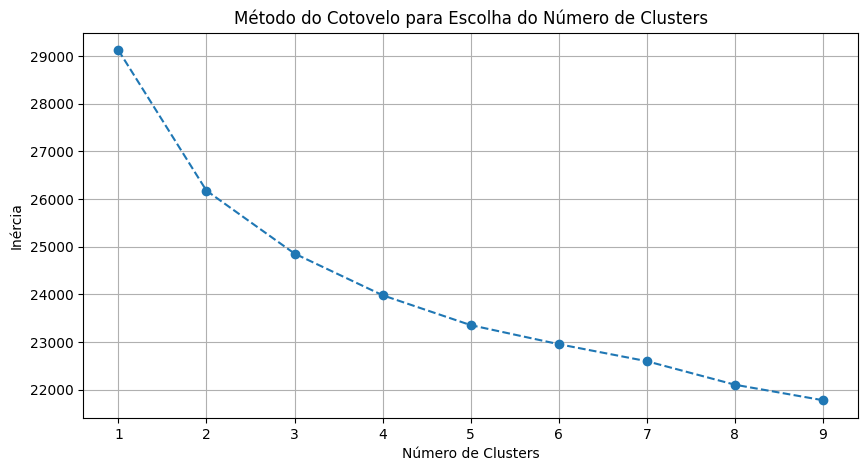

In [15]:
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)

# Vamos determinar o número ideal de clusters usando o método do cotovelo
inertia = []

for n_clusters in range(1, 10):  # Testar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Escolha do Número de Clusters')
plt.grid(True)
plt.show()

Devido ao alto número de dimensões, o método do cotovelo não se demonstra muito efetivo, devido a isso, vamos aplicar o TSNE.

In [16]:
"""from sklearn.manifold import TSNE

# Aplicar o t-SNE para reduzir a dimensionalidade para 2 componentes
tsne = TSNE(n_components=2, random_state=0)
tsne_fit = tsne.fit_transform(df)

# Criar um DataFrame com os resultados do t-SNE
df_tsne = pd.DataFrame(data=tsne_fit, columns=['t-SNE1', 't-SNE2'])"""

#tentamos criar, mas o processo foi muito lento devido a complexidade do TSNE

"from sklearn.manifold import TSNE\n\n# Aplicar o t-SNE para reduzir a dimensionalidade para 2 componentes\ntsne = TSNE(n_components=2, random_state=0)\ntsne_fit = tsne.fit_transform(df)\n\n# Criar um DataFrame com os resultados do t-SNE\ndf_tsne = pd.DataFrame(data=tsne_fit, columns=['t-SNE1', 't-SNE2'])"

TSNE demorou um século, acabamos usando o PCA, mas já sabemos que o Dataset tem 5 classificações

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


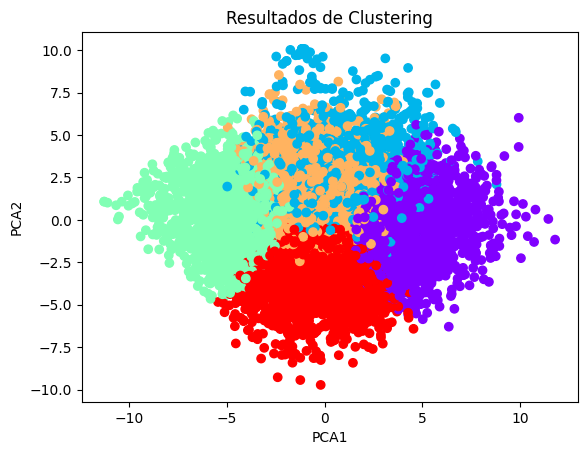

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Suponha que 'df' seja o seu DataFrame original
# ...

# Converter DataFrame para inteiro
df_inteiro = df.astype(int)

# Reduzir a dimensionalidade usando PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_inteiro)

# Aplicar o algoritmo de clustering (K-Means, Agglomerative Clustering, DBSCAN, etc.)
# Primeiro k-means
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df_inteiro)

# Adicionar a coluna 'Cluster' ao DataFrame df_inteiro
df_inteiro['Cluster'] = clusters

# Visualizar os clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df_inteiro['Cluster'], cmap='rainbow')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Resultados de Clustering')
plt.show()


In [18]:
df_inteiro['Cluster'].value_counts()


4    2249
3    2224
0    2099
2    1910
1    1518
Name: Cluster, dtype: int64

In [19]:
from sklearn.cluster import DBSCAN
# instanciar o modelo
dbscan = DBSCAN(eps=0.5, min_samples=5)

# dar o fit nos dados
dbscan.fit(data_pca)

DBSCAN()

In [20]:
df_scan = pd.DataFrame(data=data_pca, columns=['PCA1', 'PCA2'])
df_scan['classe_dbscan'] = dbscan.labels_

In [21]:
df_scan.info

<bound method DataFrame.info of           PCA1      PCA2  classe_dbscan
0    -5.651739 -1.563318              0
1     0.005630  3.510118              0
2    -0.857531  2.308327              0
3     0.966425  0.031544              0
4    -2.804201  2.467478              0
...        ...       ...            ...
9995  5.442050  0.188243              0
9996 -4.161018  0.398690              0
9997 -6.280165  1.314037              0
9998 -4.656338 -2.673487              0
9999  3.182001 -0.007591              0

[10000 rows x 3 columns]>

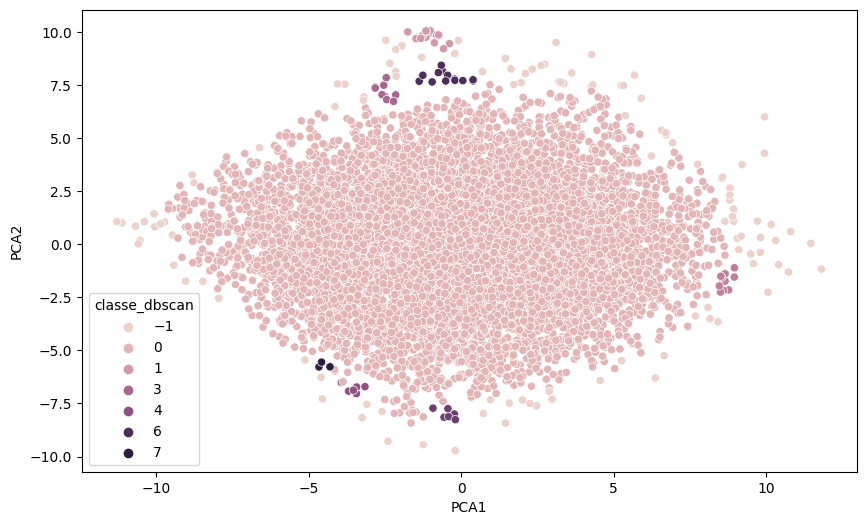

In [22]:
# DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scan, x='PCA1', y='PCA2', hue='classe_dbscan')

plt.show()

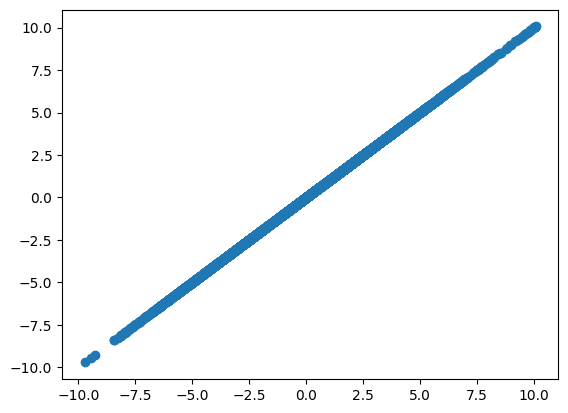

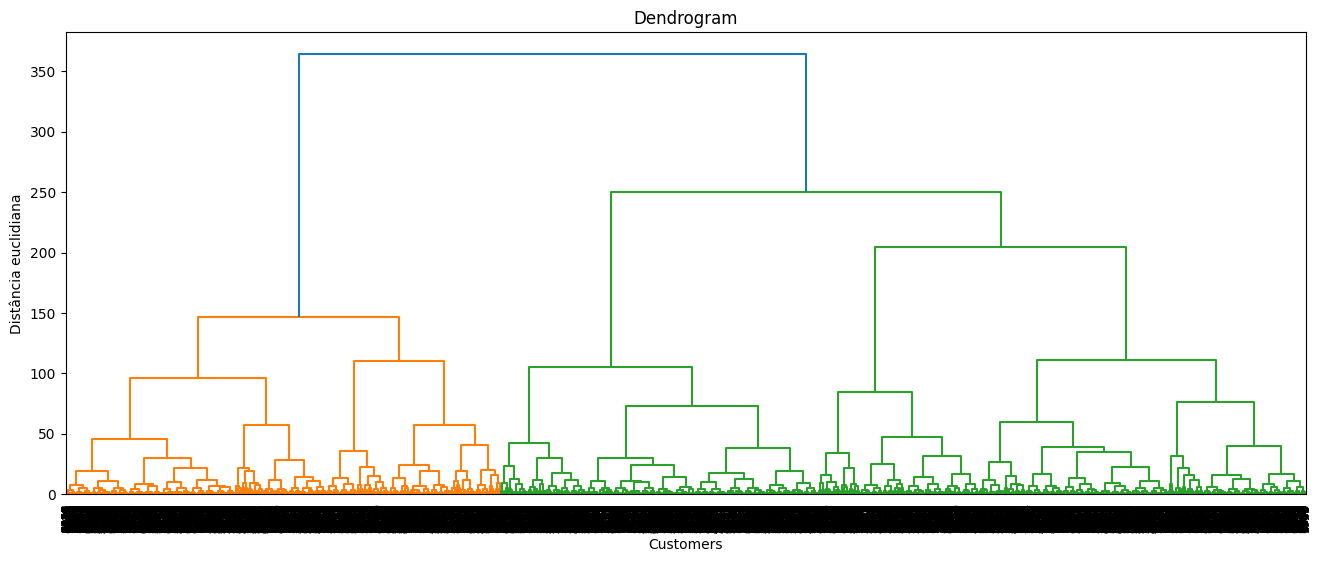

In [23]:
import scipy.cluster.hierarchy as sch


from sklearn.datasets import make_blobs

df_scan = pd.DataFrame(data_pca, columns = ['PCA1', 'PCA2'])
plt.scatter(df_scan['PCA2'], df_scan['PCA2'])

plt.show()

plt.figure(figsize=(16,6))
dendrograma = sch.dendrogram(sch.linkage(df_scan, method='ward'), leaf_font_size=8)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distância euclidiana')
plt.show()

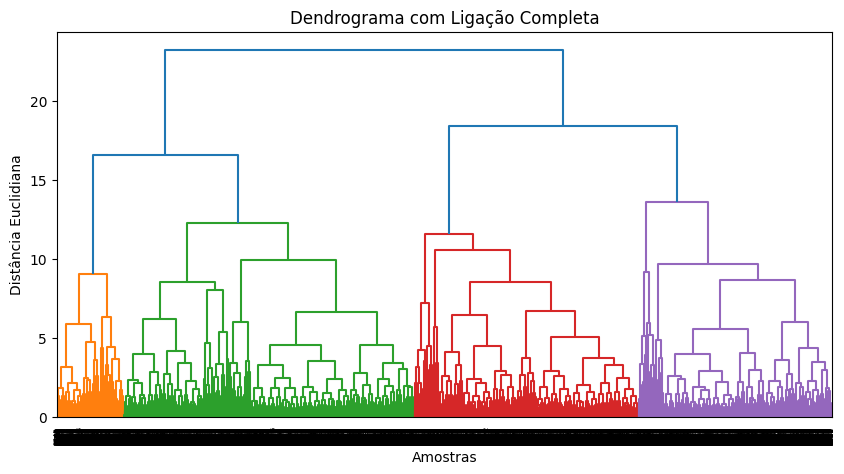

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(df_scan, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, color_threshold=14)
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.title('Dendrograma com Ligação Completa')
plt.show()

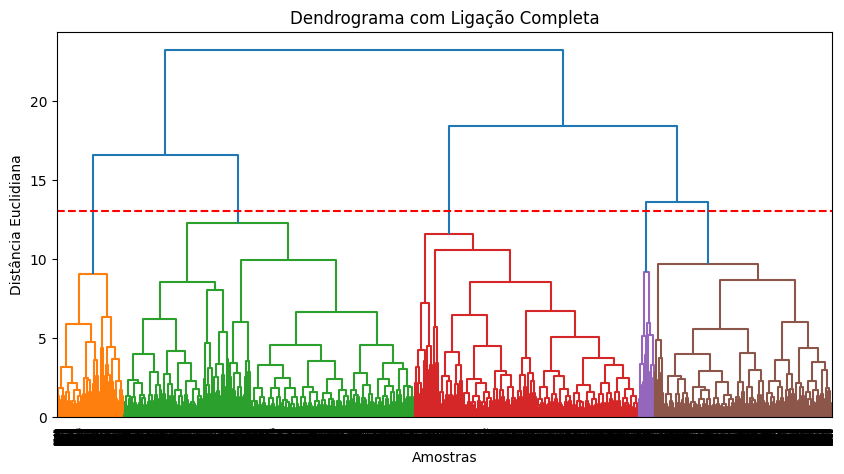

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(df_scan, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, color_threshold=13)
plt.axhline(y=13, color='r', linestyle='--')
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.title('Dendrograma com Ligação Completa')
plt.show()

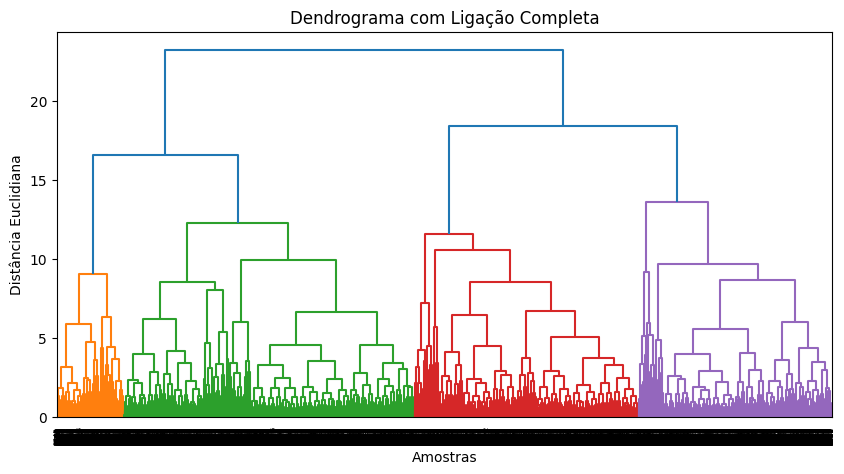

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(df_scan, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, color_threshold=15)
plt.xlabel('Amostras')
plt.ylabel('Distância Euclidiana')
plt.title('Dendrograma com Ligação Completa')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

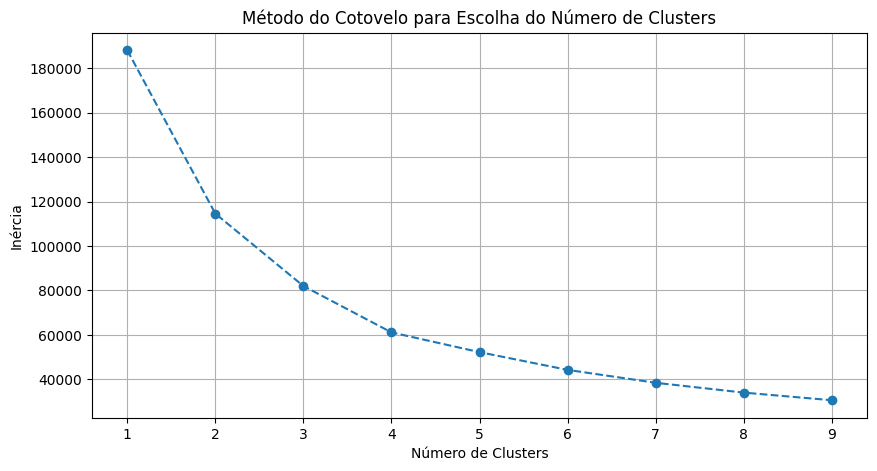

In [27]:
# Vamos determinar o número ideal de clusters usando o método do cotovelo
inertia = []

for n_clusters in range(1, 10):  # Testar de 1 a 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_scan)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Escolha do Número de Clusters')
plt.grid(True)
plt.show()